# Task 1 : Prediction Using Supervised ML 

__Author : Tanush Shetty__

__In this task we have to predict percentage score of a student based on number of hours studied. We have 2 variables, feature being no. of hours studied & target value is percentage score. This can be solved by simple linear regression.__

### Importing required libraries

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [22]:
#importing dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)


In [23]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [25]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Hours v/s Scores scatterplot


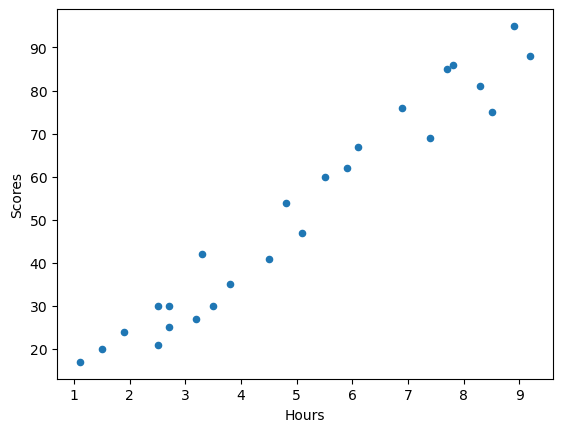

In [61]:
print("Hours v/s Scores scatterplot");
data.plot(kind='scatter', x='Hours',y='Scores');
plt.show()

In [28]:
data.corr(method= 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<font size="5">**Linear regression**</font>

In [41]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [48]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [52]:
print('Intercept    : ', reg.intercept_)
print('Coefficients : ', reg.coef_[0])

Intercept    :  2.8102364628265804
Coefficients :  9.59563563045602


In [57]:
line = reg.coef_* X + reg.intercept_

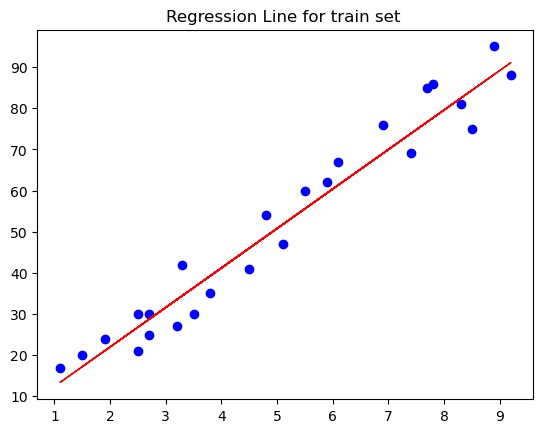

In [62]:
plt.title("Regression Line for train set ")
plt.scatter(X, y,  color='blue')
plt.plot(X, line, color='red', linewidth=1)
plt.show()

In [65]:
y_pred = reg.predict(X_test)
predicted_value = pd.DataFrame({'Hours':X_test.flatten(),'Actual_Score':y_test,'Predicted_Score':y_pred}) 
predicted_value

,Hours,Actual_Score,Predicted_Score
0,8.9,95,88.211394
1,2.7,30,28.718453
2,6.9,76,69.020122
3,3.8,35,39.273652
4,1.1,17,13.365436


<font size="3">**Predicted score if a student studies for 9.25 hours / day**</font>

In [71]:
hours = np.array(9.25)
pred = reg.predict(value.reshape(-1,1))
print('If a student studies for {} hrs / day then he/she will score = {} %'.format(hours,pred[0]))

If a student studies for 9.25 hrs / day then he/she will score = 91.56986604454477 %


<font size="5">**Model evaluation**</font>

In [68]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean absolute error:', metrics.mean_absolute_error(y_test,y_pred))
print('R2 score: ', r2_score(y_test, y_pred))

Mean absolute error: 4.5916495300630285
R2 score:  0.971014141329942
